

```
# Importing Libraries
```



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
movies = pd.read_csv('/content/drive/MyDrive/Collab_Movie_recommender/movies.csv')

In [8]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [9]:
ratings = pd.read_csv('/content/drive/MyDrive/Collab_Movie_recommender/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
ratings['userId'].value_counts()

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
207,20
442,20
53,20


# How many unique "userId" are available in "ratings.csv"?

In [11]:
ratings['userId'].nunique()

610

In [12]:
links = pd.read_csv('/content/drive/MyDrive/Collab_Movie_recommender/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [13]:
tags = pd.read_csv('/content/drive/MyDrive/Collab_Movie_recommender/tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [14]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [17]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [18]:
movies_links_merged = pd.merge(movies, links, on='movieId', how='inner')

full_merged_df = pd.merge(movies_links_merged, ratings, on='movieId', how='inner')



# Check the structure and a few rows of the merged dataset

merged_df_info = full_merged_df.info()

merged_df_head = full_merged_df.head()



merged_df_info, merged_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   imdbId     100836 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100836 non-null  int64  
 6   rating     100836 non-null  float64
 7   timestamp  100836 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


(None,
    movieId             title                                       genres  \
 0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
 1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
 2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
 3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
 4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
 
    imdbId  tmdbId  userId  rating   timestamp  
 0  114709   862.0       1     4.0   964982703  
 1  114709   862.0       5     4.0   847434962  
 2  114709   862.0       7     4.5  1106635946  
 3  114709   862.0      15     2.5  1510577970  
 4  114709   862.0      17     4.5  1305696483  )

# Find the movie with the maximum number of user ratings

In [19]:

most_rated_movie = full_merged_df.groupby('title').size().idxmax()
most_rated_movie_count = full_merged_df.groupby('title').size().max()

most_rated_movie, most_rated_movie_count


('Forrest Gump (1994)', 329)

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [20]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
matrix_movie_id = movies[movies['title'].str.contains("Matrix, The (1999)", case=False, regex=False)]['movieId'].values[0]

# Filter the tags associated with "The Matrix (1999)" movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

matrix_tags


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


# Find the movieId for "Terminator 2: Judgment Day (1991)"

In [21]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Filter ratings for "Terminator 2: Judgment Day (1991)"
terminator_ratings = full_merged_df[full_merged_df['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating_terminator = terminator_ratings.mean()

average_rating_terminator


3.970982142857143

# Find the movie ID for "Fight Club (1999)"

In [22]:
# Find the movie ID for "Fight Club (1999)"
fight_club = movies[movies['title'] == "Fight Club (1999)"]
fight_club_id = fight_club['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_id]
print(fight_club_ratings['rating'].describe())


count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


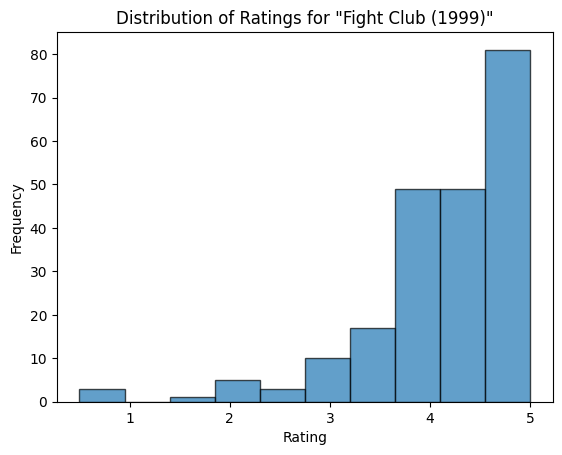

In [23]:

plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-ae4afc9b3892>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fight_club_ratings['rating'], shade=True)


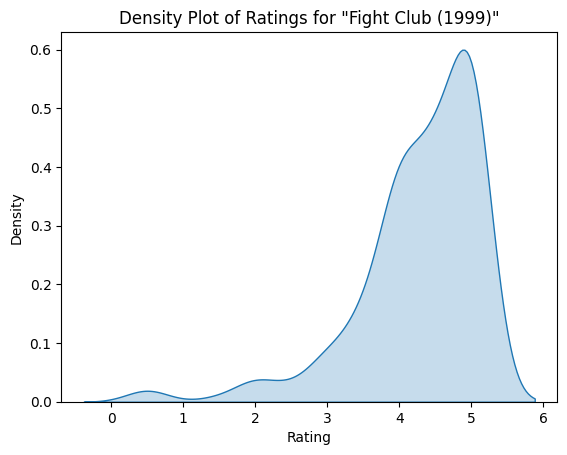

In [24]:
sns.kdeplot(fight_club_ratings['rating'], shade=True)
plt.title('Density Plot of Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


# Filter movies with more than 50 ratings

In [25]:
# Group by 'movieId' and calculate count and mean of ratings
ratings_grouped = ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

# Merge movies with the aggregated ratings data
movies_with_ratings = pd.merge(movies, ratings_grouped, on='movieId')

# Filter movies with more than 50 ratings
movies_filtered = movies_with_ratings[movies_with_ratings['count'] > 50]

# Optional: Save the filtered dataframe to a CSV file for further analysis
movies_filtered.to_csv('movies_filtered.csv', index=False)

print(movies_filtered.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count  mean_rating  
0  Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                   Adventure|Children|Fantasy    110     3.431818  
2                               Comedy|Romance     52     3.259615  
5                        Action|Crime|Thriller    102     3.946078  
6                               Comedy|Romance     54     3.185185  


In [26]:
movies_filtered.head()

,movieId,title,genres,count,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


# Display the most popular movie based on average user ratings

In [27]:
most_popular_movie = movies_filtered.loc[movies_filtered['mean_rating'].idxmax()]

# Display the most popular movie based on average user ratings
print(most_popular_movie[['title', 'mean_rating']])

title          Shawshank Redemption, The (1994)
mean_rating                            4.429022
Name: 277, dtype: object


# Sort movies by number of ratings in descending order and select top 5

In [28]:
# Sort movies by number of ratings in descending order and select top 5
top_5_popular_movies = movies_filtered.sort_values(by='count', ascending=False).head(5)

# Display the top 5 movies based on number of user ratings
print(top_5_popular_movies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


# Display the third most popular Sci-Fi movie based on number of user ratings


In [29]:
# Filter Sci-Fi movies
sci_fi_movies = movies_filtered[movies_filtered['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by number of ratings in descending order and select the third one
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]

# Display the third most popular Sci-Fi movie based on number of user ratings
print(third_most_popular_sci_fi[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [30]:
# Merge with movies_filtered to get IMDB links
movies_with_links = pd.merge(movies_filtered, links, on='movieId')


In [31]:
import requests
from bs4 import BeautifulSoup

url = f'https://www.imdb.com/chart/top/?ref_=nv_mv_250'

url

'https://www.imdb.com/chart/top/?ref_=nv_mv_250'

In [32]:
response = requests.get(url)
response

<Response [403]>

In [33]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

In [34]:
rating_tag = soup.find('span', itemprop='ratingValue')

In [35]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt0{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', itemprop='ratingValue')
    return imdb_rating.text if imdb_rating else np.nan


In [36]:
scrapper(111161)

nan

In [37]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def scrapper(imdbId):
    # Format the IMDb ID
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt0{new_id}/"

    # Set up request headers
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    # Make the request
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an HTTPError for bad responses
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return np.nan

    # Parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    imdb_rating = soup.find('span', itemprop='ratingValue')

    # Return the rating or NaN
    return imdb_rating.text if imdb_rating else np.nan

# Test the function
print(scrapper('0133093'))  # Example IMDb ID for "The Shawshank Redemption"


Request failed: 404 Client Error: Not Found for url: https://www.imdb.com/title/tt00133093/
nan


In [38]:
movies[movies['title'] == "Shawshank Redemption, The (1994)"]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [39]:
links[links['movieId']== 318]

,movieId,imdbId,tmdbId
277,318,111161,278.0


In [42]:
# Jurassic Park (1993)
movies[movies['title'] == "Jurassic Park (1993)"]


,movieId,title,genres
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [43]:
links[links['movieId']== 480]

,movieId,imdbId,tmdbId
418,480,107290,329.0
